# Problem Statement

ABC Tech management is looking for ways to improve the incident
management process as recent customer survey results shows that
incident management is rated as poor.

In [1]:
pip install mysql-connector

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import mysql.connector
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
connection=mysql.connector.connect(host = '18.136.157.135',
                                  user='dm_team',
                                  password='DM!$Team@&27920!')
print(connection)

In [4]:
cursor=connection.cursor()
cursor.execute('show databases')
for i in cursor:
    print(i)

('information_schema',)
('project_itsm',)


In [5]:
connection=mysql.connector.connect(host='18.136.157.135',
                                  user='dm_team',
                                  password='DM!$Team@&27920!',
                                  database='project_itsm')

In [6]:
data=pd.read_sql('SELECT CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change FROM project_itsm.dataset_list',con=connection)
data

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,Category,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4,incident,...,,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1,SD0000007,2,,
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3,incident,...,02-12-2013 12:31,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1,SD0000011,1,,
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NA,request for information,...,,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1,SD0000017,,,
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4,incident,...,,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1,SD0000025,,,
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4,incident,...,,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1,SD0000029,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46601,SBA000464,application,Server Based Application,WBS000073,IM0047053,Closed,4,4,4,incident,...,,31-03-2014 16:29,31-03-2014 16:29,"0,095",Other,1,SD0147021,,,
46602,SBA000461,application,Server Based Application,WBS000073,IM0047054,Closed,4,4,4,incident,...,,31-03-2014 15:29,31-03-2014 15:29,"0,428333333",User error,1,SD0146967,,,
46603,LAP000019,computer,Laptop,WBS000091,IM0047055,Closed,5,5,5,incident,...,,31-03-2014 15:32,31-03-2014 15:32,"0,071666667",Hardware,1,SD0146982,,,
46604,WBA000058,application,Web Based Application,WBS000073,IM0047056,Closed,4,4,4,incident,...,,31-03-2014 15:42,31-03-2014 15:42,"0,116944444",Software,1,SD0146986,,,


In [7]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [8]:
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import itertools
import statsmodels.api as sm
import joblib

In [9]:
data.shape

(46606, 24)

In [10]:
data.columns

Index(['CI_Name', 'CI_Cat', 'CI_Subcat', 'WBS', 'Incident_ID', 'Status',
       'Impact', 'Urgency', 'Priority', 'Category', 'KB_number',
       'Alert_Status', 'No_of_Reassignments', 'Open_Time', 'Reopen_Time',
       'Resolved_Time', 'Close_Time', 'Handle_Time_hrs', 'Closure_Code',
       'No_of_Related_Interactions', 'Related_Interaction',
       'No_of_Related_Incidents', 'No_of_Related_Changes', 'Related_Change'],
      dtype='object')

In [11]:
data.head(3)

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,Category,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4,incident,...,,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1,SD0000007,2,,
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3,incident,...,02-12-2013 12:31,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1,SD0000011,1,,
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NA,request for information,...,,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1,SD0000017,,,


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   CI_Name                     46606 non-null  object
 1   CI_Cat                      46606 non-null  object
 2   CI_Subcat                   46606 non-null  object
 3   WBS                         46606 non-null  object
 4   Incident_ID                 46606 non-null  object
 5   Status                      46606 non-null  object
 6   Impact                      46606 non-null  object
 7   Urgency                     46606 non-null  object
 8   Priority                    46606 non-null  object
 9   Category                    46606 non-null  object
 10  KB_number                   46606 non-null  object
 11  Alert_Status                46606 non-null  object
 12  No_of_Reassignments         46606 non-null  object
 13  Open_Time                   46606 non-null  ob

In [13]:
data['Priority']=data['Priority'].replace('NA',np.nan)
data['Priority']=data['Priority'].astype('float64')



In [14]:
data['No_of_Reassignments']=data['No_of_Reassignments'].replace('',np.nan)
data['No_of_Reassignments']=data['No_of_Reassignments'].astype('float64')

In [15]:
data['No_of_Related_Interactions']=data['No_of_Related_Interactions'].replace('',np.nan)
data['No_of_Related_Interactions']=data['No_of_Related_Interactions'].astype('float64')

In [16]:
data['No_of_Related_Incidents']=data['No_of_Related_Incidents'].replace('',np.nan)
data['No_of_Related_Incidents']=data['No_of_Related_Incidents'].astype('float64')

In [17]:
data['No_of_Related_Changes']=data['No_of_Related_Changes'].replace('',np.nan)
data['No_of_Related_Changes']=data['No_of_Related_Changes'].astype('float64')

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CI_Name                     46606 non-null  object 
 1   CI_Cat                      46606 non-null  object 
 2   CI_Subcat                   46606 non-null  object 
 3   WBS                         46606 non-null  object 
 4   Incident_ID                 46606 non-null  object 
 5   Status                      46606 non-null  object 
 6   Impact                      46606 non-null  object 
 7   Urgency                     46606 non-null  object 
 8   Priority                    45226 non-null  float64
 9   Category                    46606 non-null  object 
 10  KB_number                   46606 non-null  object 
 11  Alert_Status                46606 non-null  object 
 12  No_of_Reassignments         46605 non-null  float64
 13  Open_Time                   466

In [19]:
data.CI_Cat.replace(['database'],'storage',inplace=True)
data.CI_Cat.replace(['applicationcomponent'],'subapplication',inplace=True)
data.CI_Cat.replace(['displaydevice','officeelectronics','Phone','networkcomponents'],'hardware',inplace=True)
data.CI_Cat.replace(np.nan,'application',inplace=True)

In [20]:
data.CI_Subcat.replace('Desktop','Desktop Application',inplace=True)
data.CI_Subcat.replace(['Application Server','Virtual Tape Server','ESX Server','zOS Server','Neoview Server','X86 Server',
                       'Unix Server','Oracle Server','Windows Server in extern beheer','Thin Client','NonStop Server',
                       'Number','Windows Server','Linux Server',np.nan,'SharePoint Farm','Lines'],
                       'Server Based Application',inplace=True)
data.CI_Subcat.replace('RAC Service','Banking Device',inplace=True)
data.CI_Subcat.replace(['Iptelephony','Protocol','Net Device','IPtelephony','ESX Cluster','Standard Application'],
                       'Web Based Application',inplace=True)
data.CI_Subcat.replace(['VMWare','Security Software','zOS Systeem','Firewall','Database Software','VDI','Instance',
                       'MQ Queue Manager','Automation Software','Citrix','SAP','Encryption'],'System Software',inplace=True)
data.CI_Subcat.replace(['UPS','Omgeving'],'Client Based Application',inplace=True)
data.CI_Subcat.replace(['NonStop Storage','NonStop Harddisk','Tape Library','zOS Cluster','DataCenterEquipment',
                       'MigratieDummy'],'Database',inplace=True)
data.CI_Subcat.replace(['Modem','Router'],'Network Component',inplace=True)
data.CI_Subcat.replace('KVM Switches','Switch',inplace=True)

In [21]:
data.No_of_Related_Interactions.replace(np.nan,1,inplace=True)
data.Priority.replace(np.nan,4,inplace=True)
data.No_of_Related_Incidents.replace(np.nan,0,inplace=True)
data.No_of_Related_Changes.replace(np.nan,0,inplace=True)

# 1. Predicting Priorities

In [22]:
x = data.loc[:,['CI_Cat','CI_Subcat','WBS','Category']]
y = data.Priority

In [23]:
x.head(2)

,CI_Cat,CI_Subcat,WBS,Category
0,subapplication,Web Based Application,WBS000162,incident
1,application,Web Based Application,WBS000088,incident


In [24]:
enc = LabelEncoder()
for i in (0,1,2,3):
    x.iloc[:,i] = enc.fit_transform(x.iloc[:,i])
    

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=10)

In [26]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [27]:
x_train.shape

(32624, 4)

In [28]:
x_test.shape

(13982, 4)

# Models


### 1. Support Vector Machine

In [29]:
#training the model
from sklearn.svm import SVC
rbf_svc = SVC(kernel='rbf',C=10,gamma=0.1).fit(x_train,y_train)

In [30]:
y_predict_svm = rbf_svc.predict(x_test)

In [31]:
print(accuracy_score(y_test,y_predict_svm))
print(classification_report(y_test,y_predict_svm))

0.7473895007867258
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         1
         2.0       0.50      0.65      0.56       210
         3.0       0.56      0.31      0.40      1581
         4.0       0.72      0.89      0.80      7254
         5.0       0.87      0.68      0.76      4936

    accuracy                           0.75     13982
   macro avg       0.53      0.51      0.50     13982
weighted avg       0.75      0.75      0.74     13982



In [32]:
confusion_matrix(y_test,y_predict_svm)

array([[   0,    0,    0,    1,    0],
       [   0,  137,    8,   56,    9],
       [   0,   36,  485,  960,  100],
       [   0,   92,  305, 6458,  399],
       [   0,   10,   75, 1481, 3370]], dtype=int64)

### 2. Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier
model_dtree = DecisionTreeClassifier()
model_dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [34]:
y_predict_dtree = model_dtree.predict(x_test)

In [35]:
print(accuracy_score(y_test,y_predict_dtree))
print(classification_report(y_test,y_predict_dtree))

0.81690745243885
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         1
         2.0       0.52      0.69      0.59       210
         3.0       0.66      0.63      0.65      1581
         4.0       0.82      0.87      0.85      7254
         5.0       0.88      0.80      0.84      4936

    accuracy                           0.82     13982
   macro avg       0.58      0.60      0.58     13982
weighted avg       0.82      0.82      0.82     13982



In [36]:
confusion_matrix(y_test,y_predict_dtree)

array([[   0,    0,    0,    1,    0],
       [   0,  144,    6,   43,   17],
       [   0,   42,  998,  421,  120],
       [   0,   80,  457, 6326,  391],
       [   0,   12,   51,  919, 3954]], dtype=int64)

### 3. Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(max_depth = 27)
model_rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=27)

In [38]:
y_predict_rf = model_rf.predict(x_test)

In [39]:
print(accuracy_score(y_test,y_predict_rf))
print(classification_report(y_test,y_predict_rf))

0.8170504934916321
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         1
         2.0       0.52      0.66      0.59       210
         3.0       0.66      0.63      0.64      1581
         4.0       0.82      0.87      0.85      7254
         5.0       0.88      0.80      0.84      4936

    accuracy                           0.82     13982
   macro avg       0.58      0.59      0.58     13982
weighted avg       0.82      0.82      0.82     13982



In [40]:
confusion_matrix(y_test,y_predict_rf)

array([[   0,    0,    0,    1,    0],
       [   0,  139,   11,   43,   17],
       [   0,   37,  991,  431,  122],
       [   0,   78,  451, 6332,  393],
       [   0,   11,   47,  916, 3962]], dtype=int64)

### 4. K-Nearest Neighbor

In [41]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=12,metric='euclidean')
model_knn.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=12)

In [42]:
y_predict_knn = model_knn.predict(x_test)

In [43]:
print(accuracy_score(y_test,y_predict_knn))
print(classification_report(y_test,y_predict_knn))

0.812187097697039
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         1
         2.0       0.52      0.66      0.58       210
         3.0       0.64      0.63      0.63      1581
         4.0       0.81      0.88      0.84      7254
         5.0       0.89      0.78      0.83      4936

    accuracy                           0.81     13982
   macro avg       0.57      0.59      0.58     13982
weighted avg       0.82      0.81      0.81     13982



In [44]:
confusion_matrix(y_test,y_predict_knn)

array([[   0,    0,    0,    1,    0],
       [   0,  138,    9,   44,   19],
       [   0,   37,  993,  427,  124],
       [   0,   79,  477, 6388,  310],
       [   0,   10,   79, 1010, 3837]], dtype=int64)

### 5. Artificial Neural Network

In [45]:
from sklearn.neural_network import MLPClassifier
model_mlp = MLPClassifier()
model_mlp.fit(x_train,y_train)

MLPClassifier()

In [46]:
y_predict_mlp = model_mlp.predict(x_test)

In [47]:
print(accuracy_score(y_test,y_predict_mlp))
print(classification_report(y_test,y_predict_mlp))

0.7651265913317122
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         1
         2.0       0.52      0.65      0.58       210
         3.0       0.57      0.41      0.48      1581
         4.0       0.74      0.88      0.81      7254
         5.0       0.88      0.71      0.79      4936

    accuracy                           0.77     13982
   macro avg       0.54      0.53      0.53     13982
weighted avg       0.77      0.77      0.76     13982



In [48]:
confusion_matrix(y_test,y_predict_mlp)

array([[   0,    0,    0,    1,    0],
       [   0,  137,   10,   53,   10],
       [   0,   36,  655,  788,  102],
       [   0,   78,  416, 6409,  351],
       [   0,   10,   71, 1358, 3497]], dtype=int64)

In [49]:
joblib.dump(model_rf,'predicting-priority.ml')

['predicting-priority.ml']

# 2. Predicting Request For Change (RFC)

In [50]:
x1 = data.loc[:,['CI_Subcat','WBS','Priority','Category','No_of_Related_Interactions','No_of_Related_Incidents']]
y1 = data.No_of_Related_Changes

In [51]:
x1.head(2)

,CI_Subcat,WBS,Priority,Category,No_of_Related_Interactions,No_of_Related_Incidents
0,Web Based Application,WBS000162,4.0,incident,1.0,2.0
1,Web Based Application,WBS000088,3.0,incident,1.0,1.0


In [52]:
enc = LabelEncoder()
for i in (0,1,3,4):
    x1.iloc[:,i] = enc.fit_transform(x1.iloc[:,i])

In [53]:
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=0.3,random_state=10)

In [54]:
sc = StandardScaler()
x1_train = sc.fit_transform(x1_train)
x1_test = sc.transform(x1_test)

In [55]:
x1_train.shape

(32624, 6)

In [56]:
x1_test.shape

(13982, 6)

# Models

### 1. Decision Tree

In [57]:
from sklearn.tree import DecisionTreeClassifier
model1_dtree = DecisionTreeClassifier()
model1_dtree.fit(x1_train,y1_train)

DecisionTreeClassifier()

In [58]:
y1_predict_dtree = model1_dtree.predict(x1_test)

In [59]:
print(accuracy_score(y1_test,y1_predict_dtree))
print(classification_report(y1_test,y1_predict_dtree))

0.9885567157774281
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     13835
         1.0       0.20      0.03      0.05       138
         2.0       0.00      0.00      0.00         8
         3.0       0.00      0.00      0.00         1

    accuracy                           0.99     13982
   macro avg       0.30      0.26      0.26     13982
weighted avg       0.98      0.99      0.98     13982



In [60]:
confusion_matrix(y1_test,y1_predict_dtree)

array([[13818,    16,     1,     0],
       [  134,     4,     0,     0],
       [    8,     0,     0,     0],
       [    1,     0,     0,     0]], dtype=int64)

### 2. Random Forest

In [61]:
from sklearn.ensemble import RandomForestClassifier
model1_rf = RandomForestClassifier()
model1_rf.fit(x1_train,y1_train)

RandomForestClassifier()

In [62]:
y1_predict_rf = model1_rf.predict(x1_test)

In [63]:
print(accuracy_score(y1_test,y1_predict_rf))
print(classification_report(y1_test,y1_predict_rf))

0.9890573594621657
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     13835
         1.0       0.25      0.02      0.04       138
         2.0       0.00      0.00      0.00         8
         3.0       0.00      0.00      0.00         1

    accuracy                           0.99     13982
   macro avg       0.31      0.26      0.26     13982
weighted avg       0.98      0.99      0.98     13982



In [64]:
confusion_matrix(y1_test,y1_predict_rf)

array([[13826,     9,     0,     0],
       [  135,     3,     0,     0],
       [    8,     0,     0,     0],
       [    1,     0,     0,     0]], dtype=int64)

In [65]:
joblib.dump(model1_dtree,'predict_RFC.ml')

['predict_RFC.ml']

# 3. Forecasting the Incident Volume

In [66]:
incfrq = data.loc[:,['Incident_ID','Open_Time']]

In [67]:
incfrq.head()

,Incident_ID,Open_Time
0,IM0000004,05-02-2012 13:32
1,IM0000005,12-03-2012 15:44
2,IM0000006,29-03-2012 12:36
3,IM0000011,17-07-2012 11:49
4,IM0000012,10-08-2012 11:01


In [68]:
for i in range(len(incfrq.Open_Time)):
    if (incfrq.Open_Time[i][1]=='/'):
        incfrq.Open_Time[i] = dt.datetime.strptime(incfrq.Open_Time[i],'%d/%m/%Y %H:%M').data()
    elif (incfrq.Open_Time[i][2]=='/'):
        incfrq.Open_Time[i] = dt.datetime.strptime(incfrq.Open_Time[i],'%d/%m/%Y %H:%M').date()
    else:
        incfrq.Open_Time[i] = dt.datetime.strptime(incfrq.Open_Time[i], '%d-%m-%Y %H:%M').date()

In [69]:
incfrq.head()

,Incident_ID,Open_Time
0,IM0000004,2012-02-05
1,IM0000005,2012-03-12
2,IM0000006,2012-03-29
3,IM0000011,2012-07-17
4,IM0000012,2012-08-10


In [70]:
incfrq['No_Incidents'] = incfrq.groupby('Open_Time')['Incident_ID'].transform('count')

In [71]:
incfrq.drop(['Incident_ID'],axis=1,inplace=True)
incfrq.drop_duplicates(inplace=True)

In [72]:
incfrq.head(3)

,Open_Time,No_Incidents
0,2012-02-05,1
1,2012-03-12,1
2,2012-03-29,1


In [73]:
incfrq = incfrq.set_index('Open_Time')
incfrq.index = pd.to_datetime(incfrq.index)
incfrq.index

DatetimeIndex(['2012-02-05', '2012-03-12', '2012-03-29', '2012-07-17',
               '2012-08-10', '2012-08-15', '2012-08-22', '2012-08-29',
               '2012-09-03', '2012-09-21',
               ...
               '2014-03-22', '2014-03-24', '2014-03-23', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31'],
              dtype='datetime64[ns]', name='Open_Time', length=331, freq=None)

In [74]:
incfrq.head()

,No_Incidents
Open_Time,
2012-02-05,1
2012-03-12,1
2012-03-29,1
2012-07-17,1
2012-08-10,2


In [75]:
print(incfrq.index.min(),'to',incfrq.index.max())

2012-02-05 00:00:00 to 2014-03-31 00:00:00


In [76]:
data1 = incfrq['No_Incidents']
data1 = data1.asfreq('D')
data1.index

DatetimeIndex(['2012-02-05', '2012-02-06', '2012-02-07', '2012-02-08',
               '2012-02-09', '2012-02-10', '2012-02-11', '2012-02-12',
               '2012-02-13', '2012-02-14',
               ...
               '2014-03-22', '2014-03-23', '2014-03-24', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31'],
              dtype='datetime64[ns]', name='Open_Time', length=786, freq='D')

In [77]:
data1.head()

Open_Time
2012-02-05    1.0
2012-02-06    NaN
2012-02-07    NaN
2012-02-08    NaN
2012-02-09    NaN
Freq: D, Name: No_Incidents, dtype: float64

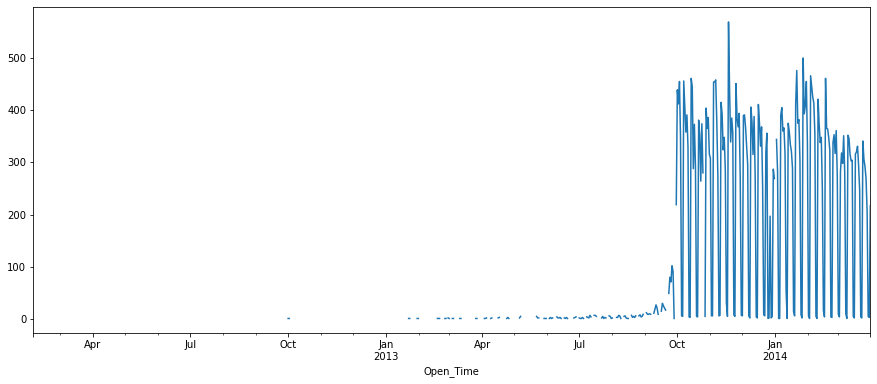

In [78]:
data1.plot(figsize=(15,6))
plt.show()

In [79]:
incfrom2013 = incfrq[incfrq.index > dt.datetime(2013,10,1)]

In [80]:
incfrom2013.head()

,No_Incidents
Open_Time,
2013-10-02,412
2013-10-03,455
2013-10-04,345
2013-10-07,456
2013-10-05,6


In [81]:
data2 = incfrom2013['No_Incidents']
data2 = data2.asfreq('D')
data2.index

DatetimeIndex(['2013-10-02', '2013-10-03', '2013-10-04', '2013-10-05',
               '2013-10-06', '2013-10-07', '2013-10-08', '2013-10-09',
               '2013-10-10', '2013-10-11',
               ...
               '2014-03-22', '2014-03-23', '2014-03-24', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31'],
              dtype='datetime64[ns]', name='Open_Time', length=181, freq='D')

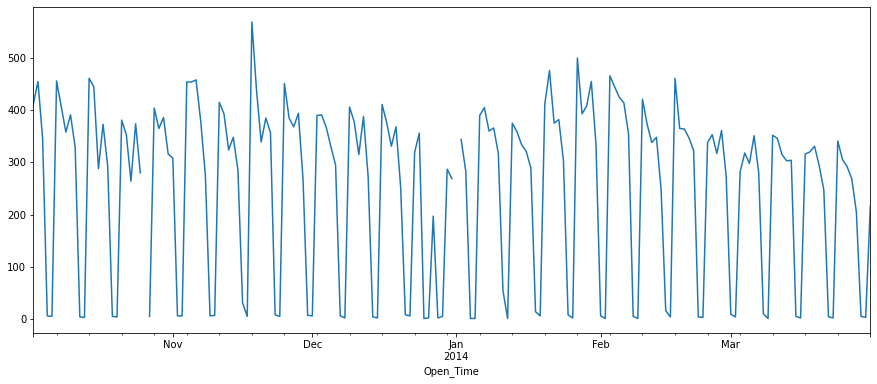

In [82]:
data2.plot(figsize=(15,6))
plt.show()

In [83]:
p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))

In [84]:
for param in pdq:
    mod = sm.tsa.statespace.SARIMAX(data2,order = param,enforce_stationarity=False,enforce_invertibilitty=False)
    results = mod.fit()
    print('ARIMA{} - AIC:{}'.format(param,results.aic))

ARIMA(0, 0, 0) - AIC:2539.6180293605685
ARIMA(0, 0, 1) - AIC:2373.78538246851
ARIMA(0, 1, 0) - AIC:2371.128960804689
ARIMA(0, 1, 1) - AIC:2313.1378368360524
ARIMA(1, 0, 0) - AIC:2365.291646936565
ARIMA(1, 0, 1) - AIC:2337.3125086864075
ARIMA(1, 1, 0) - AIC:2373.128068065154
ARIMA(1, 1, 1) - AIC:2294.4321140192114


In [85]:
mod = sm.tsa.statespace.SARIMAX(data2,order=(1,1,1))
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3386      0.090      3.771      0.000       0.163       0.515
ma.L1         -0.9989      0.428     -2.332      0.020      -1.839      -0.159
sigma2       2.52e+04   9781.767      2.576      0.010    6023.442    4.44e+04


In [86]:
pred = results.get_prediction(start=pd.to_datetime('2014-3-3'),end=pd.to_datetime('2014-10-30'),dynamic=False)
pred_ci = pred.conf_int()
pred.predicted_mean.round()

2014-03-03    172.0
2014-03-04    266.0
2014-03-05    279.0
2014-03-06    272.0
2014-03-07    291.0
              ...  
2014-10-26    252.0
2014-10-27    252.0
2014-10-28    252.0
2014-10-29    252.0
2014-10-30    252.0
Freq: D, Name: predicted_mean, Length: 242, dtype: float64

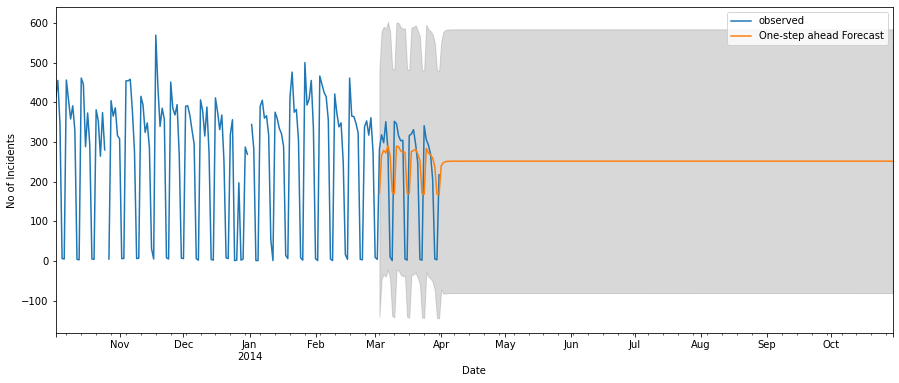

In [87]:
ax = data2['2013':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast',figsize=(15,6))
ax.fill_between(pred_ci.index,pred_ci.iloc[:,0],pred_ci.iloc[:,1],color='grey',alpha=0.3)
ax.set_xlabel('Date')
ax.set_ylabel('No of Incidents')
plt.legend()
plt.show()

# Analysis

 The data is ordinal, nominal as well as categorical. To analyze the data, various data processing 
techniques like Label Encoding and Standardization is used.For training the data and predicting the target, algorithms used are Support Vector Machine, Decision Tree, Random Forest, K-Nearest Neighbor and Artificial Neural Network. Volume Forecasting is done with the help of Statsmodels & Matplotlib.

# The analysis is done in three parts:

 1. Predicting Priorities: The predictor variables are Category, CI Category, CI Subcategory &           WBS
 2. Predicting Request for Change (RFC): The predictor variables are Category, CI Subcategory,           WBS, Priority,Number of Related Interaction, Number of Related Incidents
 3. Forecasting the Incident Volume: The predictor variable is opening time.

# Summary

### The project is done with the purpose of:

 1. Finding out factors which affects priority and training a model which accurately predicts it so       that preventive measures can be taken for High Priority Tickets and reassigning can be reduced.
 2. Finding out factors which affect RFC and predicting it.
 3. Forecasting Incident Volume in the future so that they can be better prepared with resources and                  technology planning.


### The following steps are carried out:

 1. Importing the data, necessary libraries, & exploring the data to look for missing values.
 2. Selecting the features for analysis, label encoding the ordinal column and splitting the data         into test & train.
 3. Training the data using algorithms like Support Vector Machine, Decision Tree, Random Forest, K-     Nearest Neighbor and Artificial Neural Network and checking the accuracy to find out which           algorithm is the best.
 4. Exporting the model with highest accuracy.
 5. For Incident Volume Forecasting, Ticket Opening Time is taken and Time Series Forecasting is         used.

# Results

 For predicting Ticket Priority, Random Forest gives almost 98.5% accuracy. Predicting RFC accurately is not possible with this data. And Volume Forecasting is visualized with the help of Matplotlib throughout the year.